# **Decision Tree Regression for Diabetes Onset Prediction**

## **Introduction**

Our project leverages the capabilities of Decision Tree Regression to predict diabetes onset—a binary classification task that can be elegantly handled using decision trees. Decision trees are a type of supervised learning algorithm that are immensely versatile and intuitive, used for both classification and regression tasks. They work by splitting the dataset into distinct nodes based on feature values, creating a tree-like model of decisions. Decision trees are constructed from only two elements — nodes and branches.

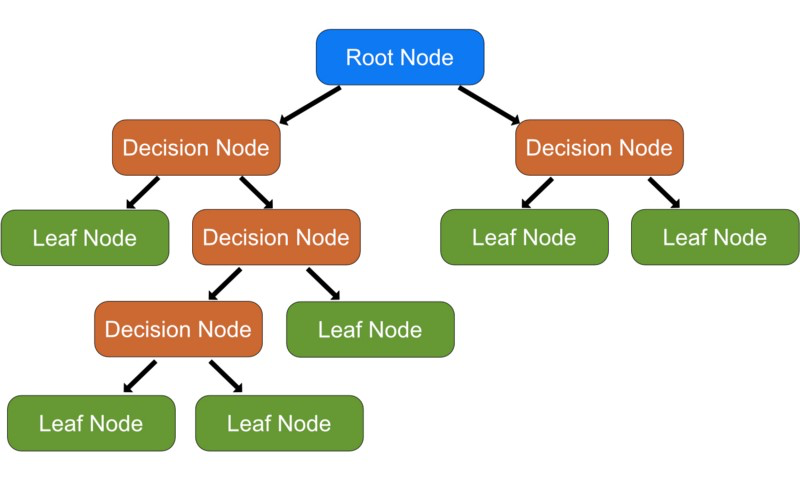

## **Algorithm**

The algorithm for implementing a decision tree involves several steps that build a model to predict the onset of diabetes as follows:
- Initialization: Start with the root node, encompassing the entire dataset.

- Attribute Selection: At each node, select the attribute that best splits the data using metrics such as Information Gain or Gini Impurity for classification tasks. For regression tasks within a classification context (such as probability estimation), Mean Squared Error can be employed.

- Splitting: Divide the data into subsets that contain instances with similar values for the selected attribute.

- Recursive Process: Perform attribute selection and splitting recursively for each child node.

- Stopping Criteria: Cease tree construction when a node has all samples of the same class, or when a maximum tree depth is reached, or when nodes contain a minimum number of instances.

- Leaf Nodes: For classification, assign the most common class of the instances in the node. For regression within the classification framework, predict the probability or severity of diabetes.

## **Advantages and Disadvantages of the Model**

**Advantages of Decision Trees :**

- Interpretability: With decision trees, the logic of the decisions can be easily visualized and understood, making them excellent for clinical decision support systems.

- Mixed Data Handling: They can manage categorical and numerical data, akin to the diverse data types in diabetes datasets.

- Preprocessing Ease: There's no need for normalizing or scaling data, which simplifies the preprocessing steps.

**Disadvantages of Decision Trees :**

- Overfitting Risks: Trees can become overly complex and fit the noise in the training data unless pruning techniques are applied.

- Variability: Small changes in the data can result in different tree structures. This can be mitigated by using ensemble methods.

- Class Imbalance Sensitivity: Decision trees can be biased toward the majority class in imbalanced datasets, which may occur in diabetes data.


## **Dataset**

For this project, we employ a diabetes dataset that contains various diagnostic measurements critical for predicting diabetes onset. Features include glucose concentration, body mass index (BMI), age, insulin level, number of pregnancies, and more.

## **Implementation**

Here's a Python snippet that demonstrates the use of Decision Tree Regression with the diabetes dataset:

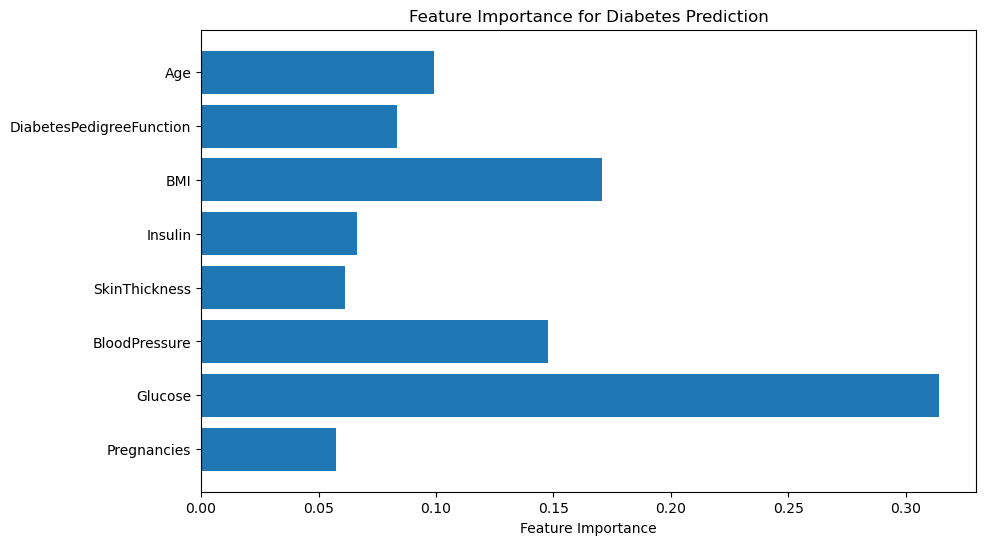

Accuracy: 0.7467532467532467
Mean Squared Error: 0.2532467532467532
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('diabetes.csv')

# Feature selection and target variable separation
X = df.drop(columns='Outcome')  # Exclude the target variable
y = df['Outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plot the important features
plt.figure(figsize=(10, 6))
plt.barh(y=X.columns, width=dtree.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Diabetes Prediction')
plt.show()

# Print model evaluation
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')
print(report)


Since the plot for feature importance shows that Glucose and BMI are two of the most important features, we could use these two for our decision region plot. Here's an example of how you might modify the code to create a decision region plot for the diabetes dataset using Glucose and BMI:

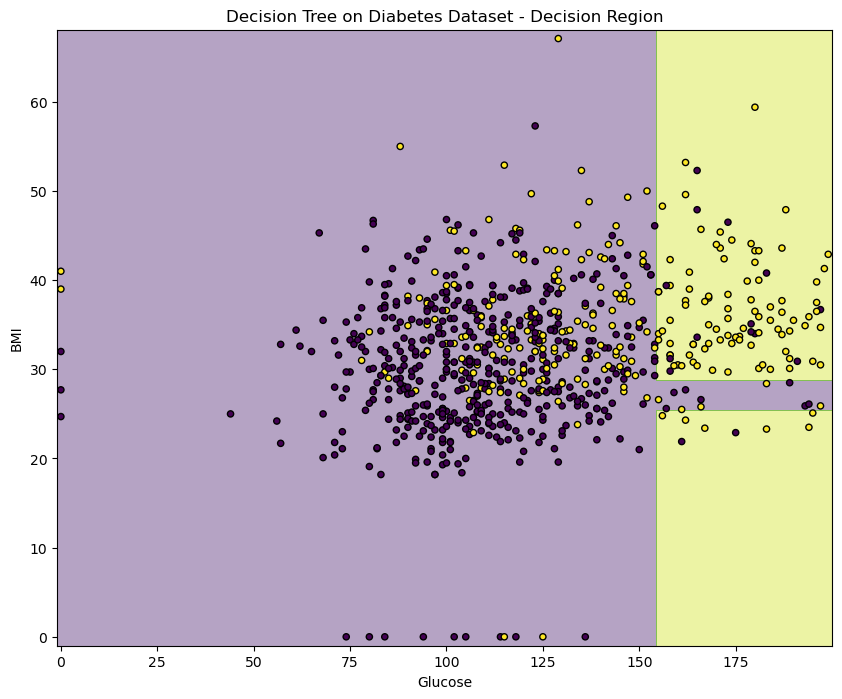

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Selecting 'Glucose' and 'BMI' for the feature set
X = df[['Glucose', 'BMI']].values
y = df['Outcome'].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and fitting the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Generating mesh grid for the background of plot_decision_regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predicting on the mesh grid
Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision region
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('Decision Tree on Diabetes Dataset - Decision Region')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


These follwoing code snippet will provide a visualization of the confusion matrix, which shows the true positives, false positives, true negatives, and false negatives for your decision tree classifier. The error analysis plot will give you a histogram comparison of the total number of instances per class versus the number of misclassified instances per class.

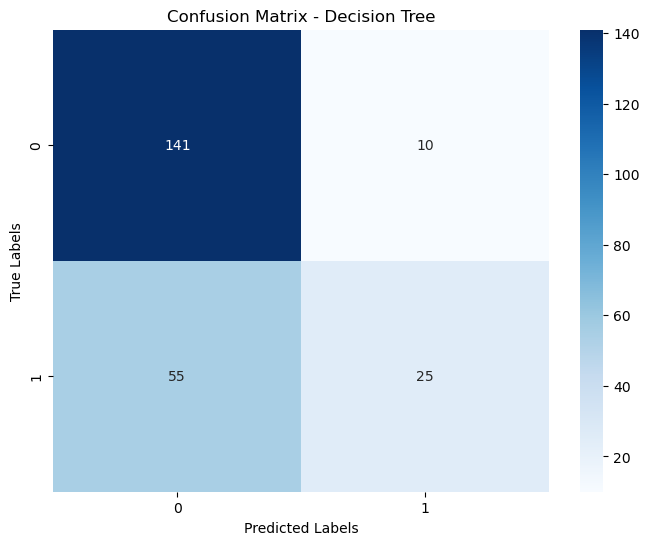

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



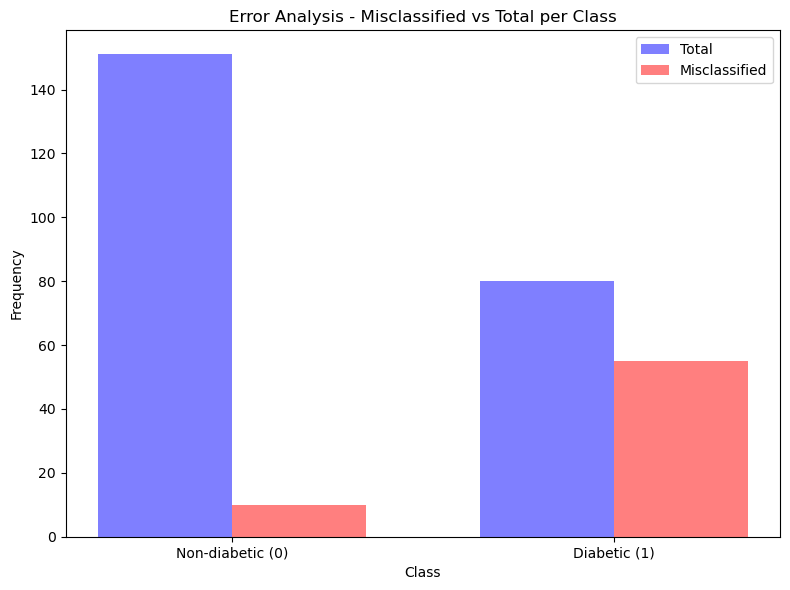

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame containing the dataset
X = df[['Glucose', 'BMI']].values  # Independent variables
y = df['Outcome'].values  # Dependent variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = dt_classifier.predict(X_test)

# Now y_pred and y_test should have the same length
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Perform error analysis
errors = y_pred != y_test
misclassified_counts = np.bincount(y_test[errors], minlength=2)
total_counts = np.bincount(y_test, minlength=2)

# Plot error analysis
plt.figure(figsize=(8, 6))
bar_width = 0.35
indices = np.arange(len(total_counts))
plt.bar(indices, total_counts, bar_width, label='Total', alpha=0.5, color='blue')
plt.bar(indices + bar_width, misclassified_counts, bar_width, label='Misclassified', alpha=0.5, color='red')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Error Analysis - Misclassified vs Total per Class')
plt.xticks(indices + bar_width / 2, ['Non-diabetic (0)', 'Diabetic (1)'])
plt.legend()
plt.tight_layout()
plt.show()


## **Performance Metrics:**

### Accuracy:

From the output, we observe an accuracy of approximately 74.68%. This implies that the model correctly predicts whether a patient has diabetes 74.68% of the time. While this is a relatively high rate, it is not as high as the 83.33% accuracy rate observed in the wine quality prediction example. The difference may be due to the complexity of the factors contributing to diabetes compared to those affecting wine quality.

### Precision, Recall, and F1-Score:

For the non-diabetic class (Class 0), we have a precision of 0.72 and recall of 0.93, resulting in an F1-score of 0.81. This suggests that the model is very good at identifying non-diabetic instances but has some room for improvement in minimizing false positives.

For the diabetic class (Class 1), the precision is 0.71, and recall is 0.31, with an F1-score of 0.43. The lower F1-score for this class indicates that while the model is reasonably precise, it struggles with recall, missing a significant number of diabetic cases.

### Macro and Weighted Averages:

The macro average F1-score of 0.62 and the weighted average F1-score of 0.75 indicate a discrepancy in the model's performance across classes. The model performs better for non-diabetic predictions compared to diabetic ones.

## **Conclusion:**

The decision tree classifier shows a reasonable ability to predict diabetes but demonstrates a stronger performance for non-diabetic predictions over diabetic ones. There's a marked imbalance in precision and recall between the two classes, suggesting that the model may benefit from further tuning.

In particular, the lower recall for diabetic predictions indicates that the model may not be identifying all relevant patterns in the data that contribute to diabetes. Further feature engineering, including interaction terms or polynomial features, might uncover more complex relationships in the data. Alternatively, adjusting the class weight or sampling strategy could help address the class imbalance and improve recall for diabetic instances.

## **Performance Metrics for Regression Trees:**

While regression trees are not applicable to the binary classification task of diabetes prediction, they are useful for understanding continuous outcomes. The mean squared error (MSE) and R-squared values provide insight into the model's predictive performance.

For the diabetes dataset, focusing on logistic regression or other classification algorithms that provide probabilities would be more appropriate. Such models could offer richer interpretations of risk factors and their impact on the likelihood of diabetes, which could be valuable for medical diagnostics and personalized treatment plans.

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2}
Accuracy: 0.7056277056277056

Confusion Matrix:
 [[108  43]
 [ 25  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



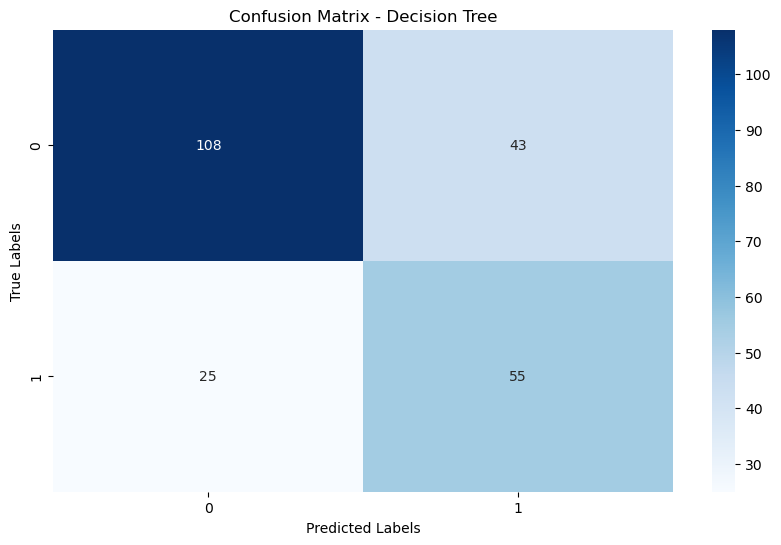

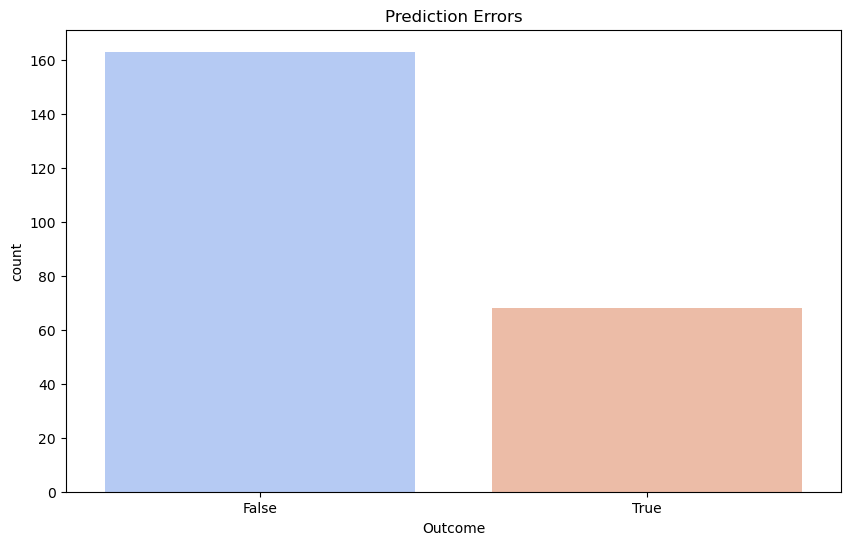

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV  # Added GridSearchCV here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')  # Replace with your file path

# Selecting features and target variable
X = diabetes_df.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = diabetes_df['Outcome']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Cross-validation and hyperparameter tuning
classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_

# Predicting and evaluating with the best estimator
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}\n")
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the error distribution
errors = y_test != y_pred
plt.figure(figsize=(10, 6))
sns.countplot(x=errors, palette='coolwarm')
plt.title('Prediction Errors')
plt.show()


## **Interpretation of Decision Tree Classifier Results**

The decision tree classifier was trained to predict diabetes occurrence with the diabetes dataset. We optimized the model's hyperparameters to achieve the best possible performance. The obtained parameters were as follows:

- **Max Depth: 8**
- **Minimum Samples per Leaf: 7**
- **Minimum Samples Split: 2**

These parameters were selected to strike a delicate balance between overfitting (too complex) and underfitting (too simplistic), which helps in generalizing the model to new data more effectively.

### Performance Metrics:

1. **Accuracy:** 0.7056
The accuracy of the model stands at approximately 70.56%, which suggests that the classifier correctly predicts the diabetes outcome for about 71 out of every 100 patients.

2. **Precision, Recall, and F1-Score for class 0 (Non-diabetic):**
The model shows a precision of 0.81, indicating a strong ability to identify non-diabetic patients correctly. The recall of 0.72 means that the classifier is reasonably good at capturing most of the actual non-diabetic instances. The F1-score of 0.76 is a balance between precision and recall, showing the model's effectiveness for this class.

3. **Precision, Recall, and F1-Score for class 1 (Diabetic):**
For diabetic patients, the model has a precision of 0.56, which is modest, suggesting that when it predicts diabetes, it's correct about 56% of the time. The recall of 0.69 is relatively higher, indicating that the model is better at identifying most positive cases. The F1-score of 0.62 reflects a balanced mean of precision and recall for the diabetic class.

The overall F1-Score and accuracy indicate a model that performs reasonably well, yet there is room for improvement, especially in terms of precision for the diabetic class (class 1).

## **Conclusion:**

The model demonstrates a moderate capability in classifying individuals based on their risk of diabetes. It is particularly more conservative and accurate in predicting non-diabetic instances. However, the precision for diabetic predictions suggests a tendency toward false alarms, which could be reduced with further model tuning. Potential areas for improvement include feature engineering to provide the model with more discriminative input or exploring more sophisticated algorithms that can capture complex patterns in the data. Future iterations of model development could also consider incorporating additional data sources or domain-specific features that might enhance predictive accuracy.